In [2]:
pip install numpy scipy scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np #for numerical cal and matrix handling
import matplotlib.pyplot as plt # for plotting 

from sklearn.linear_model import LinearRegression # for linear regression 
from sklearn.model_selection import train_test_split # Divide dat as training
from sklearn.metrics import mean_squared_error # for evaluation

np.random.seed(0) # to control the randopm num generator


In [4]:
%matplotlib inline

In [5]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)

In [6]:
import pandas as pd
filename = 'Solar_radiation_classification.csv' #Path to external in CSV format
data = pd.read_csv(filename, header=0)
data.drop(columns=['Class'], inplace=True)
X = data.values[:, :-1]
y = data.values[:, -1]
data

,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s),Wind Speed at 3m Uncertainty (m/s),Wind Speed at 3m (std dev) (m/s),DHI (Wh/m2),DHI Uncertainty (Wh/m2),Standard Deviation DHI (Wh/m2),...,Standard Deviation DNI (Wh/m2),GHI Uncertainty (Wh/m2),Standard Deviation GHI (Wh/m2),Peak Wind Speed at 3m (m/s),Peak Wind Speed at 3m Uncertainty (m/s),Relative Humidity (%),Relative Humidity Uncertainty (%),Barometric Pressure (mB (hPa equiv)),Barometric Pressure Uncertainty (mB (hPa equiv)),GHI (Wh/m2)
0,1.546567,0.0,-1.467370,0.18201,-0.331420,0.710869,-0.239125,2.033152,2.543475,0.000000,...,0.000000,0.450382,4.131493e-16,0.335854,0.182479,-1.336438,0.0,-0.449612,-0.469979,0.509240
1,1.366193,0.0,-1.442493,0.18201,-0.459034,-1.483082,-0.709637,0.726671,1.321083,0.000000,...,0.000000,0.486600,4.131493e-16,-0.359885,0.182479,-1.234901,0.0,-0.402440,-0.469979,0.520716
2,0.991570,0.0,-1.351279,0.18201,-0.841878,-1.483082,-1.180148,0.040304,0.242664,0.000000,...,0.000000,0.104739,4.131493e-16,-1.148389,0.182479,-1.152704,0.0,-0.299112,-0.469979,0.382095
3,0.145200,0.0,-1.185436,0.18201,-1.097107,-1.483082,-1.180148,-0.687110,-0.125577,0.000000,...,0.000000,-0.046037,4.131493e-16,-1.032433,0.182479,-0.983476,0.0,-0.180059,-0.021681,0.086544
4,-0.590171,0.0,-0.994717,0.18201,-0.969492,-1.483082,-0.709637,-1.045514,-0.243248,0.000000,...,0.000000,-0.098592,4.131493e-16,-0.846902,0.182479,0.249471,0.0,-0.132888,-0.021681,-0.343249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,-0.534672,0.0,-0.920088,0.18201,-0.841878,-1.483082,-1.180148,0.825019,0.710578,1.135155,...,1.447571,-0.016709,1.710223e+00,-0.545415,0.182479,-0.200192,0.0,-0.429396,-0.469979,-0.064799
637,-0.090674,0.0,-0.223547,0.18201,-1.479950,-1.483082,-1.415404,0.544577,0.763184,0.859923,...,1.456262,0.100802,2.131415e+00,-0.730946,0.182479,-0.209862,0.0,-0.463090,-0.469979,0.374960
638,0.908321,0.0,-1.517122,0.18201,-1.097107,-1.483082,-0.709637,1.575850,1.660252,1.241456,...,0.382034,0.125407,7.032136e-01,-0.475841,0.182479,-0.978641,0.0,-0.523739,-0.469979,0.611657
639,1.310693,0.0,-1.434201,0.18201,-1.479950,-1.483082,-0.944892,1.397198,1.233868,-0.461654,...,-1.591192,0.127178,-1.609528e+00,-0.962859,0.182479,-1.263911,0.0,-0.582142,-0.469979,0.796787


In [7]:
print(y.shape)
print(X.shape)

(641,)
(641, 21)


In [8]:
print('Number of training examples: ', X.shape[0])
print('Number of training examples: ', y.shape[1] if len(y.shape)>1 else 1)

Number of training examples:  641
Number of training examples:  1


#build and evaluate model

Coefficients: 

Intercept: 0.0880
Coeff- 0: 0.0855
Coeff- 1: -0.0000
Coeff- 2: -0.0011
Coeff- 3: 0.0005
Coeff- 4: -0.0032
Coeff- 5: -0.0033
Coeff- 6: -0.0003
Coeff- 7: 0.4462
Coeff- 8: -0.0220
Coeff- 9: 0.0103
Coeff-10: 0.3916
Coeff-11: 0.0161
Coeff-12: -0.0139
Coeff-13: 0.0020
Coeff-14: 0.0247
Coeff-15: 0.0051
Coeff-16: -0.0032
Coeff-17: 0.0595
Coeff-18: 0.0009
Coeff-19: -0.0332
Coeff-20: 0.0089


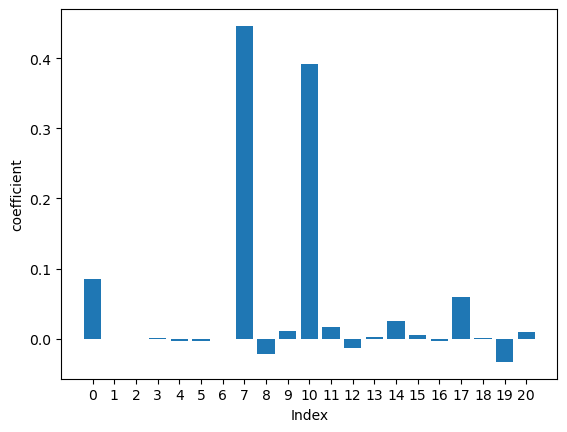


Mean squared error: 0.0025

Mean squared error: 0.0025


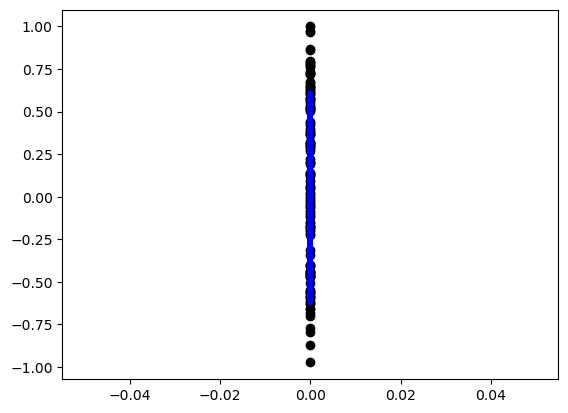

In [11]:
# Split the data into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression(fit_intercept=True) # Initialize Linear regression model

lr.fit(X_train, y_train) # Train the model using the training data

y_pred = lr.predict(X_test) # Make predictions using the testing data

# Display coefficients

print("Coefficients: \n")

print('Intercept: {0:2.4f}'.format(lr.intercept_)) 

for ii, coef in enumerate(lr.coef_):
    print('Coeff-{0:2d}: {1:2.4f}'.format(ii, coef))

plt.bar(range(len(lr.coef_)), lr.coef_)
plt.xticks(range(len(lr.coef_)))
plt.xlabel('Index')
plt.ylabel('coefficient')
plt.show()
#The mean squared error

print('\nMean squared error: {:2.4f}'.format(mean_squared_error(y_test, y_pred)))

#Plot outputs
#plt.figure()
#plt.scatter(X_test[:, 1], y test, color="black")
#plt.plot(np.sort(X_test[:, 1]), y_test[np.argsort(X_test)], color="blue", Linewidth=3)
#plt.show()

print('\nMean squared error: {:2.4f}'.format(mean_squared_error(y_test, y_pred)))


plt.figure()
plt.scatter(X_test[:, 1], y_test, color="black")
plt.plot(np.sort(X_test[:, 1]), y_test[np.argsort(X_test)], color="blue", linewidth=3)

plt.show()